In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. cleaning the data

In [6]:
# Observe that all these Object columns have two values - Yes and No

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [7]:
# Converting all the Yes to 1 and No to 0

var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [8]:
# Now again having a look at all those columns to see if everything went well

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [10]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]

,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


In [11]:
# You can also do this to separate Object columns

df.select_dtypes(include=['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [12]:
# TotalCharges should be a float but it is a Object type. Lets try converting it to float64

df['TotalCharges'] = df['TotalCharges'].astype('float64')

df.info()

ValueError: could not convert string to float: 

In [13]:
# Lets just try to see what is happening with TotalCharges. Check the output.

df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
527.35      1
154.55      1
7920.7      1
4681.75     1
3092.65     1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
# Looking at all 11 Null Values

# df.loc[df.TotalCharges == '', :]

In [15]:
# Converting empty string in TotalCharges to NaN

df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [16]:
# Observe the output, TotalCharges has 11 Missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [17]:
# Dropping customerID

df=df.drop(columns = ['customerID'], axis=1)

df.shape

(7043, 20)

In [18]:
# Getting all the Object Dtypes
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [19]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.shape

(7043, 20)

In [21]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [23]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [24]:
df = df.drop(df_categorical.columns, axis=1)

In [25]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

# Outliers

In [27]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


In [30]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [31]:
df = df[~np.isnan(df['TotalCharges'])]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

In [33]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

In [34]:
df['Churn'].value_counts()

# Churn 'Yes' are 1

0    5163
1    1869
Name: Churn, dtype: int64

# Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance

**To Do:**

1.Read about Oversampling and Undersampling.

2.Perform undersampling.

In [35]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

no_df = df.loc[df['Churn'] == 0][:1869]
yes_df = df.loc[df['Churn'] == 1]#[:1869]



combined_df = pd.concat([no_df, yes_df])
#shuffle data frame rows
new_df = combined_df.sample(frac=1, random_state=42)

In [36]:
new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3827,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6727,1,1,0,13,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2257,0,0,0,60,1,0,0,1,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3057,0,1,1,25,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2586,0,1,1,44,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
new_df.shape

(3738, 25)

# Standardization

In [38]:
x=new_df.drop('Churn',axis=1)
y=new_df['Churn']

In [40]:
print(x.shape)
print(y.shape)

(3738, 24)
(3738,)


In [39]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(3738, 24)


# Train test split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(standardized_data,y,train_size=0.8,random_state=0)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2990, 24)
(748, 24)
(2990,)
(748,)


In [45]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
tuned_parameters = [{'max_depth':[1,2,3,4],'n_estimators':[100,200]}]

eval=['accuracy','precision','recall']
for i in eval:
    clf =  RandomizedSearchCV(
    RandomForestClassifier(random_state=1), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)

    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'n_estimators': 200, 'max_depth': 4}
RandomForestClassifier(max_depth=4, n_estimators=200, random_state=1)
0.7553475935828877
Best parameters set found on train set:
for precision
{'n_estimators': 200, 'max_depth': 4}
RandomForestClassifier(max_depth=4, n_estimators=200, random_state=1)
0.7156862745098039
Best parameters set found on train set:
for recall
{'n_estimators': 200, 'max_depth': 4}
RandomForestClassifier(max_depth=4, n_estimators=200, random_state=1)
0.8133704735376045


# Training the model

In [48]:
classifier = RandomForestClassifier(max_depth=1)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=1)

# Prediction

In [49]:
y_test_predict=classifier.predict(x_test)

In [51]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [52]:
temp_data

,y_test,y_test_pred
2475,0,0
6722,0,1
804,1,1
2825,0,0
3197,1,0
...,...,...
1922,0,0
2651,1,1
467,0,1
173,1,1


# Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve

In [53]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.7406417112299465
0.6813186813186813
0.7453795533150496
0.7616707616707616
0.8635097493036211


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[244 145]
 [ 49 310]]
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       389
           1       0.68      0.86      0.76       359

    accuracy                           0.74       748
   macro avg       0.76      0.75      0.74       748
weighted avg       0.76      0.74      0.74       748



In [57]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_predict)
roc_auc = metrics.auc(fpr, tpr)

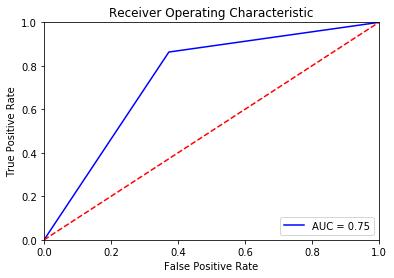

In [58]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[244, 145],
       [ 49, 310]], dtype=int64)

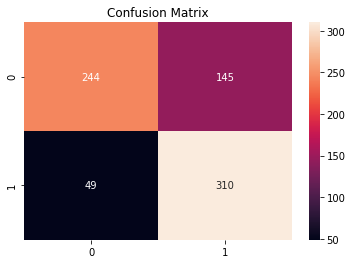

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()